In [1]:
%pylab inline
from tqdm import tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


# Assignment 5

In [2]:
from numpy.random import random, randint

R = 3
S = 0
T = 5
P = 1

m = 4 # number of rounds


### ALLC v/s ALLD

In [3]:
from numpy.random import random, randint

def fitness(member, population):
    
    num_A = population.count('A')
    N = len(population)
    fitnesses = [
        m/(N-1)*(R*(num_A-1) + S*(N-num_A)), 
        m/(N-1)*(T*num_A + P*(N-num_A-1))
        ]
    normed_fitness = [fitness/sum(fitnesses) for fitness in fitnesses]
    
    return normed_fitness[0] if member =='A' else normed_fitness[1]

In [4]:
def repeated_pd_game(population):
    freq_history = []
    while True:
        freq_history.append(population.count('A')/N)
        if population.count('A') in {0,N}: # Either species is fixed
            break
        else:            
            reproduce,replace = randint(0,N,size=2)
            if random() < fitness(population[reproduce], population):
                population[replace] = population[reproduce] 
    return freq_history

729

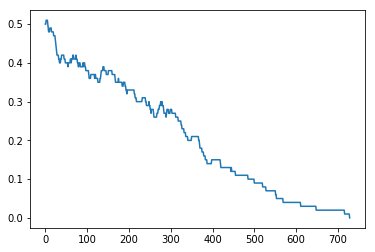

In [6]:
N=100
population  =[ 'A' if i< N//2 else 'B' for i in range(N)]
evol = repeated_pd_game(population)
plot(evol)
len(evol)

## TFT v/s ALLD

In [3]:
from numpy.random import random, randint

def fitness(member, population):
    
    num_A = population.count('A')
    N = len(population)
    fitnesses = [
        (m*R*(num_A-1) + (S+(m-1)*P)*(N-num_A))/(N-1), 
        ((T+(m-1)*P)*num_A + m*P*(N-num_A-1))/(N-1)
        ]
    normed_fitness = [fitness/sum(fitnesses) for fitness in fitnesses]
    
    return normed_fitness[0] if member =='A' else normed_fitness[1]

27275

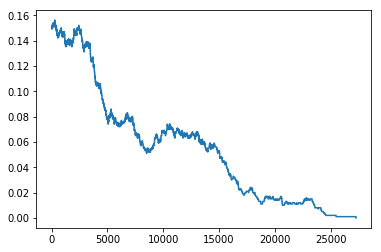

In [5]:
N=1000
population  =[ 'A' if i< 150 else 'B' for i in range(N)]

evol = repeated_pd_game(population)
plot(evol)
len(evol)

27275

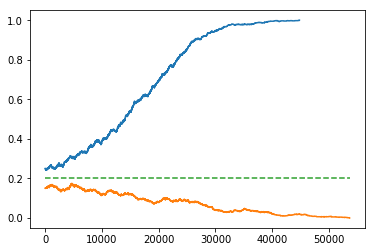

In [8]:
N=1000

population_1  =[ 'A' if i< 250 else 'B' for i in range(N)]
population_2  =[ 'A' if i< 150 else 'B' for i in range(N)]

evol1 = repeated_pd_game(population_1)
evol2 = repeated_pd_game(population_2)
 
l = linspace(0,max(len(evol1),len(evol2)),100)
n = 0.2*np.ones_like(l)

plt.plot(evol1)
plt.plot(evol2)
plt.plot(l,n,ls='--')

len(evol)